In [2]:
import celltypist
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gseapy
import anndata as ad
import os 

In [3]:
os.chdir('..')
os.chdir('..')

In [4]:
hiPSC_WA09 = sc.read_h5ad("data/hiPSC/h5ad/jovanovic_Astro.h5ad")
hiPSC_FCDI = sc.read_h5ad("data/hiPSC/h5ad/jovanovic_FCDI.h5ad")
hiPSC_Glu = sc.read_h5ad("data/hiPSC/h5ad/jovanovic_Glu.h5ad")

hiPSC_WA09.obs["CellClass"] = hiPSC_WA09.obs.ident
hiPSC_FCDI.obs["CellClass"] = hiPSC_FCDI.obs.ident
hiPSC_Glu.obs["CellClass"] = hiPSC_Glu.obs.ident

query0 = sc.read_h5ad("data/querys/unnorm_sc_C32_notreatment.h5ad")
query1 = sc.read_h5ad("data/querys/unnorm_sc_C32-24h.h5ad")
query2 = sc.read_h5ad("data/querys/unnorm_sc_C32-72h.h5ad")

In [5]:
reference = ad.concat([hiPSC_WA09, hiPSC_FCDI, hiPSC_Glu], join='outer')

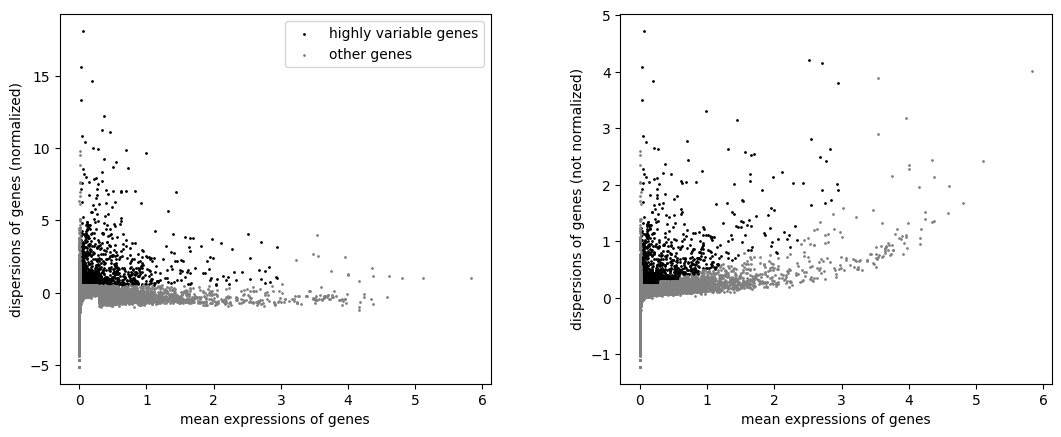

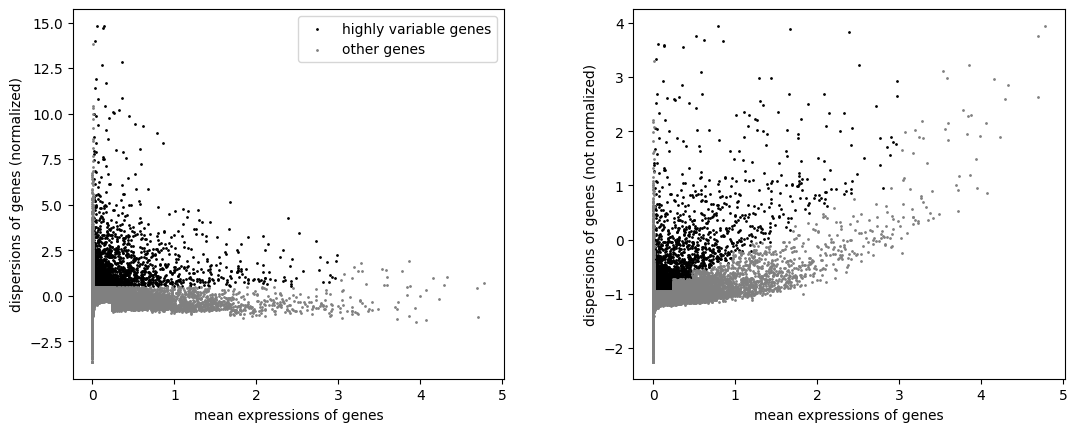

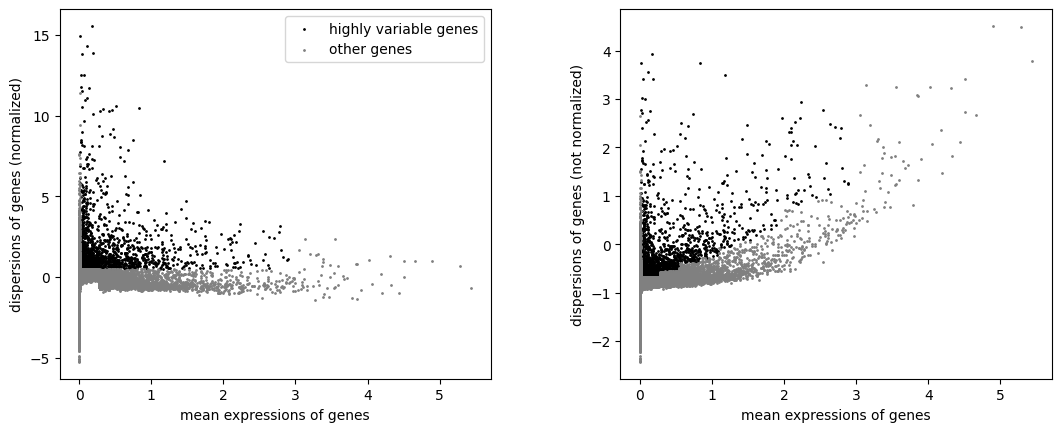

In [6]:
sc.pp.normalize_total(query0, target_sum=1e4)
sc.pp.log1p(query0)
sc.pp.highly_variable_genes(query0, min_mean=0.0125, max_mean=3,min_disp=0.5)
sc.pl.highly_variable_genes(query0)


sc.pp.normalize_total(query1, target_sum=1e4)
sc.pp.log1p(query1)
sc.pp.highly_variable_genes(query1, min_mean=0.0125, max_mean=3,min_disp=0.5)
sc.pl.highly_variable_genes(query1)

sc.pp.normalize_total(query2, target_sum=1e4)
sc.pp.log1p(query2)
sc.pp.highly_variable_genes(query2, min_mean=0.0125, max_mean=3,min_disp=0.5)
sc.pl.highly_variable_genes(query2)

sc.pp.normalize_total(reference, target_sum=1e4)
sc.pp.log1p(reference)

In [7]:
model2 = celltypist.train(reference,labels = 'CellClass', n_jobs = 10,max_iter=1000, feature_selection = True)
prediction_query1= celltypist.annotate(query0, model = model2, majority_voting=True)
prediction_query2= celltypist.annotate(query1, model = model2, majority_voting=True)
prediction_query3 = celltypist.annotate(query2, model = model2, majority_voting=True)

adata_query1 = prediction_query1.to_adata()
adata_query2 = prediction_query2.to_adata()
adata_query3 = prediction_query3.to_adata()

🍳 Preparing data before training
🔬 Input data has 22286 cells and 22264 genes
⚖️ Scaling input data
🏋️ Training data using SGD logistic regression
🔎 Selecting features
🧬 788 features are selected
🏋️ Starting the second round of training
🏋️ Training data using logistic regression
✅ Model training done!
🔬 Input data has 2732 cells and 36601 genes
🔗 Matching reference genes in the model
🧬 788 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
⛓️ Over-clustering input data with resolution set

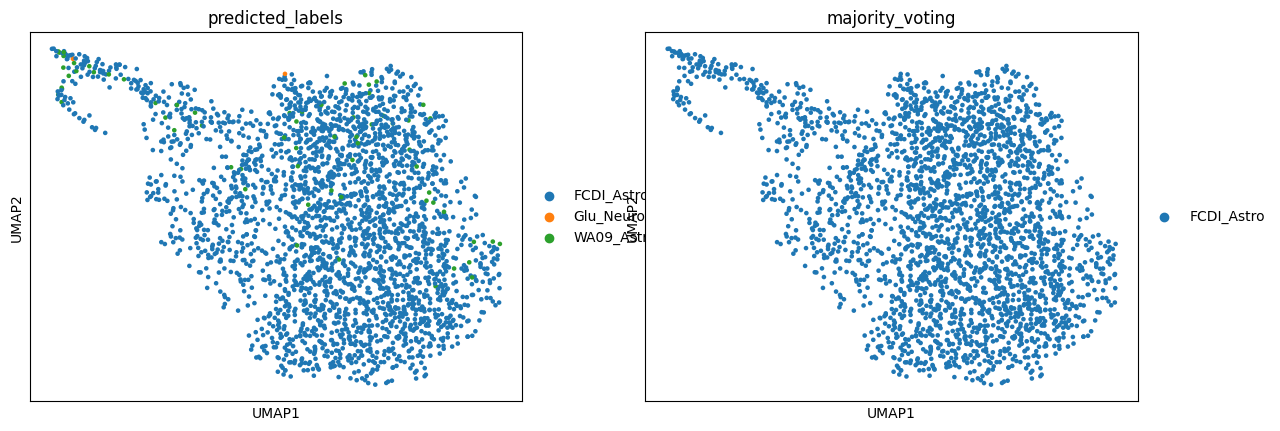

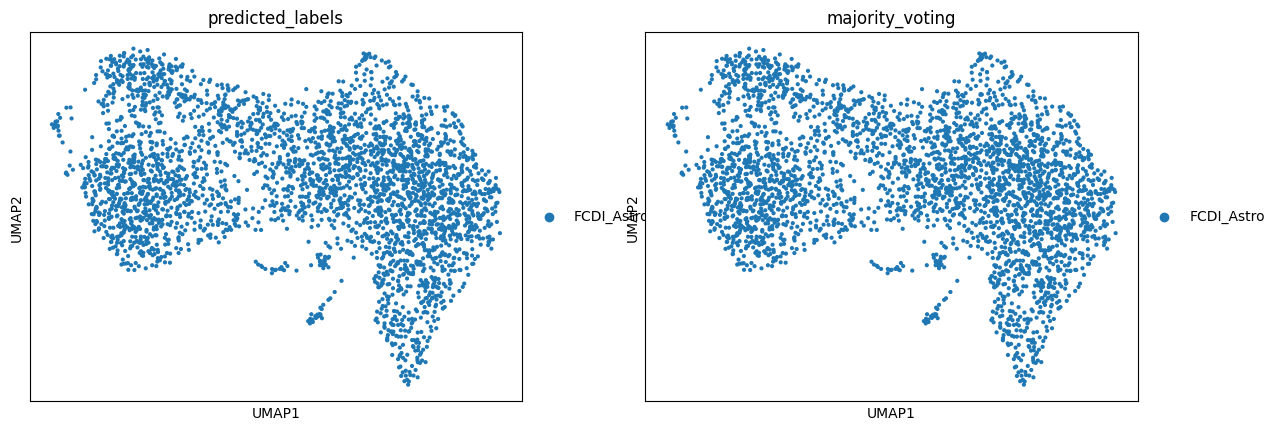

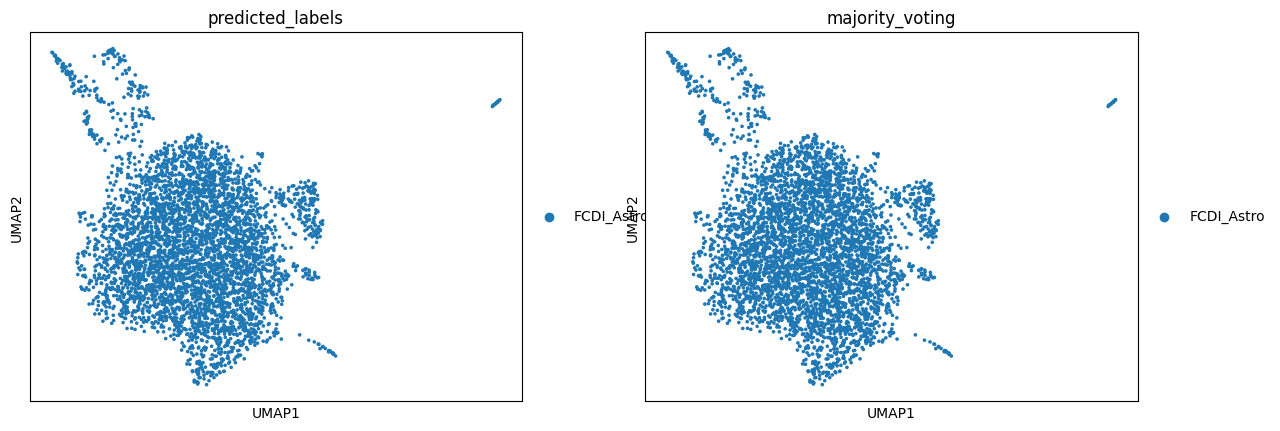

In [8]:
sc.tl.umap(adata_query1)
sc.pl.umap(adata_query1, color=["predicted_labels","majority_voting"])

sc.tl.umap(adata_query2)
sc.pl.umap(adata_query2, color=["predicted_labels","majority_voting"])


sc.tl.umap(adata_query3)
sc.pl.umap(adata_query3, color=["predicted_labels","majority_voting"])

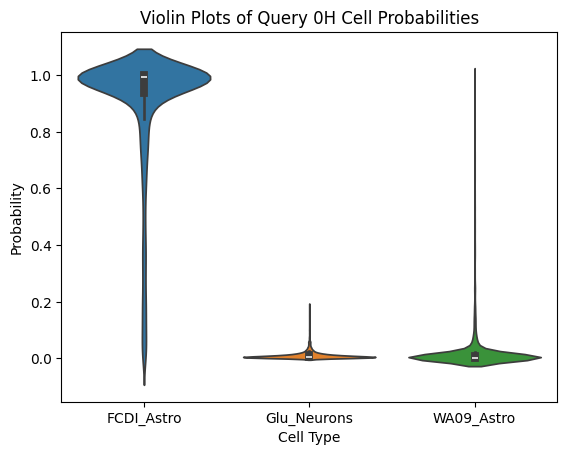

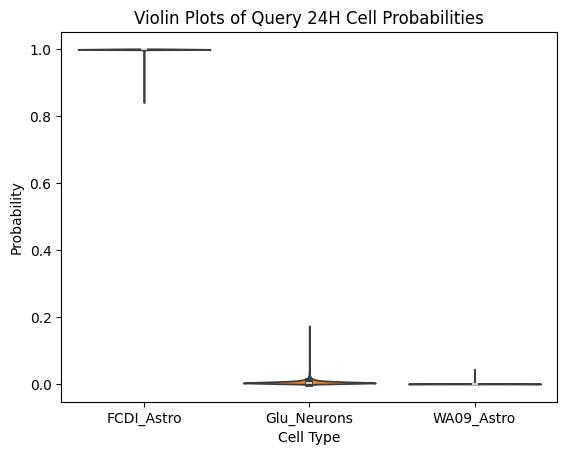

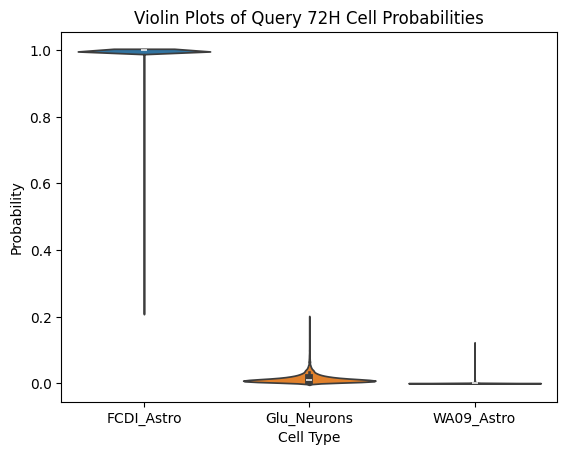

In [9]:
# Create a violin plot for each column in the same figure
plt.figure()

# Melt the DataFrame to a long format required for Seaborn's violin plot
# Plot
sns.violinplot(data=prediction_query1.probability_matrix)

# Customize plot
plt.title("Violin Plots of Query 0H Cell Probabilities")
plt.xlabel("Cell Type")
plt.ylabel("Probability")

# Show the plot
plt.show()


# Create a violin plot for each column in the same figure
plt.figure()

# Melt the DataFrame to a long format required for Seaborn's violin plot
# Plot
sns.violinplot(data=prediction_query2.probability_matrix)

# Customize plot
plt.title("Violin Plots of Query 24H Cell Probabilities")
plt.xlabel("Cell Type")
plt.ylabel("Probability")

# Show the plot
plt.show()

# Create a violin plot for each column in the same figure
plt.figure()

# Melt the DataFrame to a long format required for Seaborn's violin plot
# Plot
sns.violinplot(data=prediction_query3.probability_matrix)

# Customize plot
plt.title("Violin Plots of Query 72H Cell Probabilities")
plt.xlabel("Cell Type")
plt.ylabel("Probability")

# Show the plot
plt.show()